In [1]:
import numpy as np
import pandas as pd
import sklearn
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 2000)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
# plt.rcParams['font.size'] = 24

# Seaborn for visualization
import seaborn as sns
#sns.set(font_scale = 2)
#sns.set(style='white', context='notebook', palette='deep')

# Splitting data into training and testing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, StratifiedShuffleSplit

# XGBoost
import xgboost as xgb

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# SVM
from sklearn import svm 

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Feature Selection
from sklearn.feature_selection import RFE 

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import classification_report, matthews_corrcoef, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn import metrics

# date-time manipulation
from datetime import datetime

#import itertools
import imblearn
import matplotlib
import platform

# SMOTE / Imbalance dataset handling
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from imblearn.over_sampling import RandomOverSampler, SMOTENC, BorderlineSMOTE
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Get all version information
print('The python version is {}.'.format(platform.python_version()))
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The imblearn version is {}.'.format(imblearn.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The seaborn version is {}.'.format(sns.__version__))
print('The xgboost version is {}.'.format(xgb.__version__))

The python version is 3.6.8.
The numpy version is 1.16.5.
The pandas version is 0.24.2.
The scikit-learn version is 0.21.3.
The imblearn version is 0.4.3.
The matplotlib version is 3.0.3.
The seaborn version is 0.9.0.
The xgboost version is 0.90.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [4]:
%ls -l /content/gdrive/My\ Drive/ColabNotebooks/HDFC-Banking-Behavior/DataSet

total 298527
-rw------- 1 root root        58 Sep 13 09:32 Sample_submission.csv
-rw------- 1 root root 173413600 Sep 13 14:06 Test.csv
-rw------- 1 root root 132276866 Sep  6 08:20 Train.csv


In [0]:
# Path of Dataset

DATASET_AND_OUTPUT_PATH = "/content/gdrive/My Drive/ColabNotebooks/HDFC-Banking-Behavior/DataSet/"
TRAIN_DATASET_NAME = "Train.csv"
TEST_DATASET_NAME = "Test.csv"

In [7]:
train_df = pd.read_csv(DATASET_AND_OUTPUT_PATH + TRAIN_DATASET_NAME)
test_df = pd.read_csv(DATASET_AND_OUTPUT_PATH + TEST_DATASET_NAME)

print("Shape of train set", train_df.shape,
      "\nShape of test set ", test_df.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape of train set (17521, 2395) 
Shape of test set  (20442, 2394)


In [8]:
train_df.head()

Col1  Col2          Col3          Col4          Col5          Col6  \
0    RIGHGSN     1  1.086711e+04  8.648345e+03  1.576618e+04  2.890466e+04   
1  RIMHI5ZGP     0  2.584312e+05  2.179633e+05  1.866287e+05  1.866287e+05   
2  RIHOG1SZU     0  1.459355e+07  1.260060e+07  1.100315e+07  1.010315e+07   
3  RIHOLMQWU     0  6.727043e+05  8.181116e+05  6.794893e+05  6.794893e+05   
4  RIHO584ET     0 -1.218742e+06 -3.005361e+06 -1.666241e+05 -2.403574e+06   

           Col7          Col8          Col9         Col10         Col11  \
0  5.273655e+03  2.346153e+04  1.285597e+04  2.871509e+04  9.114586e+03   
1  2.154519e+05  1.923615e+05  1.726538e+05  1.666974e+05  2.013518e+05   
2  1.879882e+07  1.514035e+07  5.320778e+06  6.906324e+06  9.368338e+06   
3  8.257254e+05  7.605803e+05  3.577134e+05  4.236612e+05  4.304848e+05   
4  2.583183e+06  2.086546e+06  5.938358e+06  5.446532e+06  3.473444e+06   

          Col12      Col13      Col14      Col15      Col16     Col17  \
0  3.043078e+04   9.293496   8.570479  10.063117  10.271758  0.548538   
1  1.859404e+05  12.462385  12.280493  12.167132  12.136876  1.167898   
2  1.113330e+07  16.496090  16.749305  16.532874  16.128357  1.145182   
3  4.065539e+05  13.419061  13.624018  13.541837  13.429097  1.204010   
4  3.262168e+06        NaN  14.764533  14.551021        NaN       NaN   

      Col18  Col19  Col20     Col21     Col22     Col23     Col24     Col25  \
0  0.403366    NaN    NaN  1.486524  1.728324  0.993441  1.297050  0.137398   
1  2.676398    NaN    NaN  0.792123  0.934556  0.893203  0.966620  0.753892   
2  2.203874    NaN    NaN  0.422264  0.498347  0.683582  0.735339  0.808115   
3  0.536304    NaN    NaN  0.437243  0.521341  0.623499  0.534531 -0.125829   
4       NaN    NaN    NaN       NaN  1.344637       NaN  1.563430 -0.113101   

      Col26     Col27     Col28  Col29  Col30  Col31  Col32  Col33  Col34  \
0  0.115987  0.260428  1.414214      1      1      1      1      1      1   
1  0.808295  1.414214       NaN      1      1      3      4      4      0   
2  0.776910  1.414214       NaN      3      3      4     12      4      0   
3  0.388830 -1.414214       NaN      2      2      2     24      1      0   
4  0.617486  1.414214       NaN      4      3      4     68      8      0   

   Col35  Col36  Col37  Col38  Col39  Col40  Col41   Col42   Col43  Col44  \
0      0      6    NaN    NaN    NaN    NaN    NaN    6.07    6.07      2   
1      4      5    NaN    NaN    NaN    NaN    NaN  116.65  116.65      3   
2      2      4    NaN    1.0    NaN    NaN    2.0   33.28   33.28      2   
3      1      4    NaN    NaN    NaN    NaN    2.0   -7.75   -7.75      2   
4      2      4    NaN    3.0    NaN    NaN    2.0     NaN     NaN      1   

   Col45  Col46  Col47  Col48  Col49  Col50  Col51  Col52  Col53  Col54  \
0      3      2      3      2      2      2      2      1      3      1   
1      0      2      0      2      0      1      0      3      0      2   
2      1      2      0      1      0      1      0      2      1      2   
3      1      2      1      1      1      1      1      2      1      2   
4      2      1      2      1      2      1      2      1      2      1   

   Col55  Col56  Col57  Col58  Col59  Col60  Col61  Col62  Col63  Col64  \
0      3      1      2      1      2      1      1      1      1      1   
1      0      2      0      1      0      2      0      2      0      2   
2      0      1      0      1      0      1      1      1      0      1   
3      1      1      1      1      1      2      0      2      0      1   
4      2      1      2      1      2      0      2      0      2      0   

   Col65  Col66  Col67  Col68  Col69  Col70  Col71  Col72  Col73  Col74  \
0      1      1      1      3      1      3      1      3      1      3   
1      0      1      0      2      0      2      0      2      0      2   
2      0      1      0      2      1      2      1      1      0      1   
3      0      1      0      2      1      2   

1.Remove High Cardinality Features

In [0]:
# Let's create a copy of train_df and work on that
w_train_df = train_df.copy()

In [0]:
def percent_unique(InDf):
    print("Shape of dataframe", InDf.shape)
    unique = InDf.nunique()
    total = InDf.count()
    percent = round((unique/total)*100,2)
    uniqueDf  = pd.concat([unique, total, percent], axis=1, keys=["Unique count", "Total count", "Percentage Unique"])
    
    return uniqueDf

In [34]:
# Remove 90% and higher

pUnique = percent_unique(w_train_df)
# pUnique["Unique count"].sort_values()
unique_cols_to_be_removed = pUnique[pUnique["Percentage Unique"] > 90].index

Shape of dataframe (17521, 2395)


In [0]:
w_train_df.drop(columns=unique_cols_to_be_removed, axis="columns", inplace=True)

In [36]:
w_train_df.shape

(17521, 2278)

# Remove columns which have 90% missing values

In [0]:
def percent_missing(InDf):
    # print("Shape of dataframe", InDf.shape)
    total = InDf.isnull().sum().sort_values(ascending = False)
    percent = round((InDf.isnull().sum()/InDf.isnull().count()*100).sort_values(ascending = False),2)
    missingDf  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    # Print some summary information
    print ("Your selected dataframe has " + str(InDf.shape[1]) + " columns.\n"      
            "There are " + str(missingDf.shape[0]) +
              " columns that have missing values.")
    
    return missingDf

In [41]:
# checking missing data percentage in train data

missing = percent_missing(w_train_df)
missing_col_to_be_dropped = missing[missing["Percent"] > 90].index

Your selected dataframe has 2278 columns.
There are 2278 columns that have missing values.


In [0]:
w_train_df.drop(columns=missing_col_to_be_dropped, axis="columns", inplace=True)

In [43]:
train_df["Col2"].value_counts(),w_train_df["Col2"].value_counts()

(0    15760
 1     1761
 Name: Col2, dtype: int64, 0    15760
 1     1761
 Name: Col2, dtype: int64)

In [46]:
missing = percent_missing(w_train_df)
missing

Your selected dataframe has 2230 columns.
There are 2230 columns that have missing values.


,Total,Percent
Col843,15588,88.97
Col754,15584,88.94
Col853,15571,88.87
Col764,15570,88.86
Col768,15500,88.47
Col857,15500,88.47
Col852,15347,87.59
Col763,15313,87.40
Col39,15264,87.12
Col827,15045,85.87


# Let's fillna with 0

# Remove duplicate columns

In [61]:
w_train_df.T.duplicated().value_counts()

False    2106
True      124
dtype: int64

In [47]:
pUnique = percent_unique(train_df)
pUnique.head(250)

Shape of dataframe (17521, 2395)


,Unique count,Total count,Percentage Unique
Col1,17521,17521,100.00
Col2,2,17521,0.01
Col3,16309,17521,93.08
Col4,16328,17521,93.19
Col5,16327,17521,93.19
Col6,16325,17521,93.17
Col7,16310,17521,93.09
Col8,16298,17521,93.02
Col9,16329,17521,93.20
Col10,16328,17521,93.19


In [49]:
train_df["Col485"].nunique(), train_df["Col485"].value_counts()

(2, 2.0    4
 1.0    3
 Name: Col485, dtype: int64)

In [50]:
numerical_features.corr()

Output hidden; open in https://colab.research.google.com to view.

In [57]:
#find the correlation of these features with target variable.
corrmatrix=numerical_features.corr()
sorted_corrs=corrmatrix["Col2"].abs().sort_values(ascending=False)
sorted_corrs

Col2      1.000000
Col440    0.158115
Col437    0.153429
Col636    0.149626
Col243    0.148745
Col380    0.144346
Col183    0.144158
Col627    0.143149
Col431    0.142403
Col1502   0.138840
Col1322   0.138763
Col577    0.138474
Col1412   0.138181
Col2232   0.137323
Col2052   0.137235
Col1592   0.136746
Col2142   0.136646
Col2322   0.135201
Col240    0.133947
Col234    0.131950
Col1364   0.128270
Col1544   0.127741
Col1454   0.127494
Col1634   0.127063
Col51     0.126177
Col2094   0.126091
Col2274   0.125542
Col2184   0.125298
Col135    0.124898
Col2364   0.124807
            ...   
Col1109   0.000242
Col1711   0.000220
Col1126   0.000190
Col1524   0.000190
Col585    0.000190
Col573    0.000189
Col1747   0.000189
Col473    0.000173
Col1135   0.000165
Col1886   0.000133
Col1999   0.000133
Col830    0.000108
Col972    0.000104
Col858    0.000100
Col1458   0.000081
Col1201   0.000078
Col1248   0.000078
Col769    0.000068
Col1839   0.000058
Col169    0.000056
Col1558   0.000055
Col1442   0.

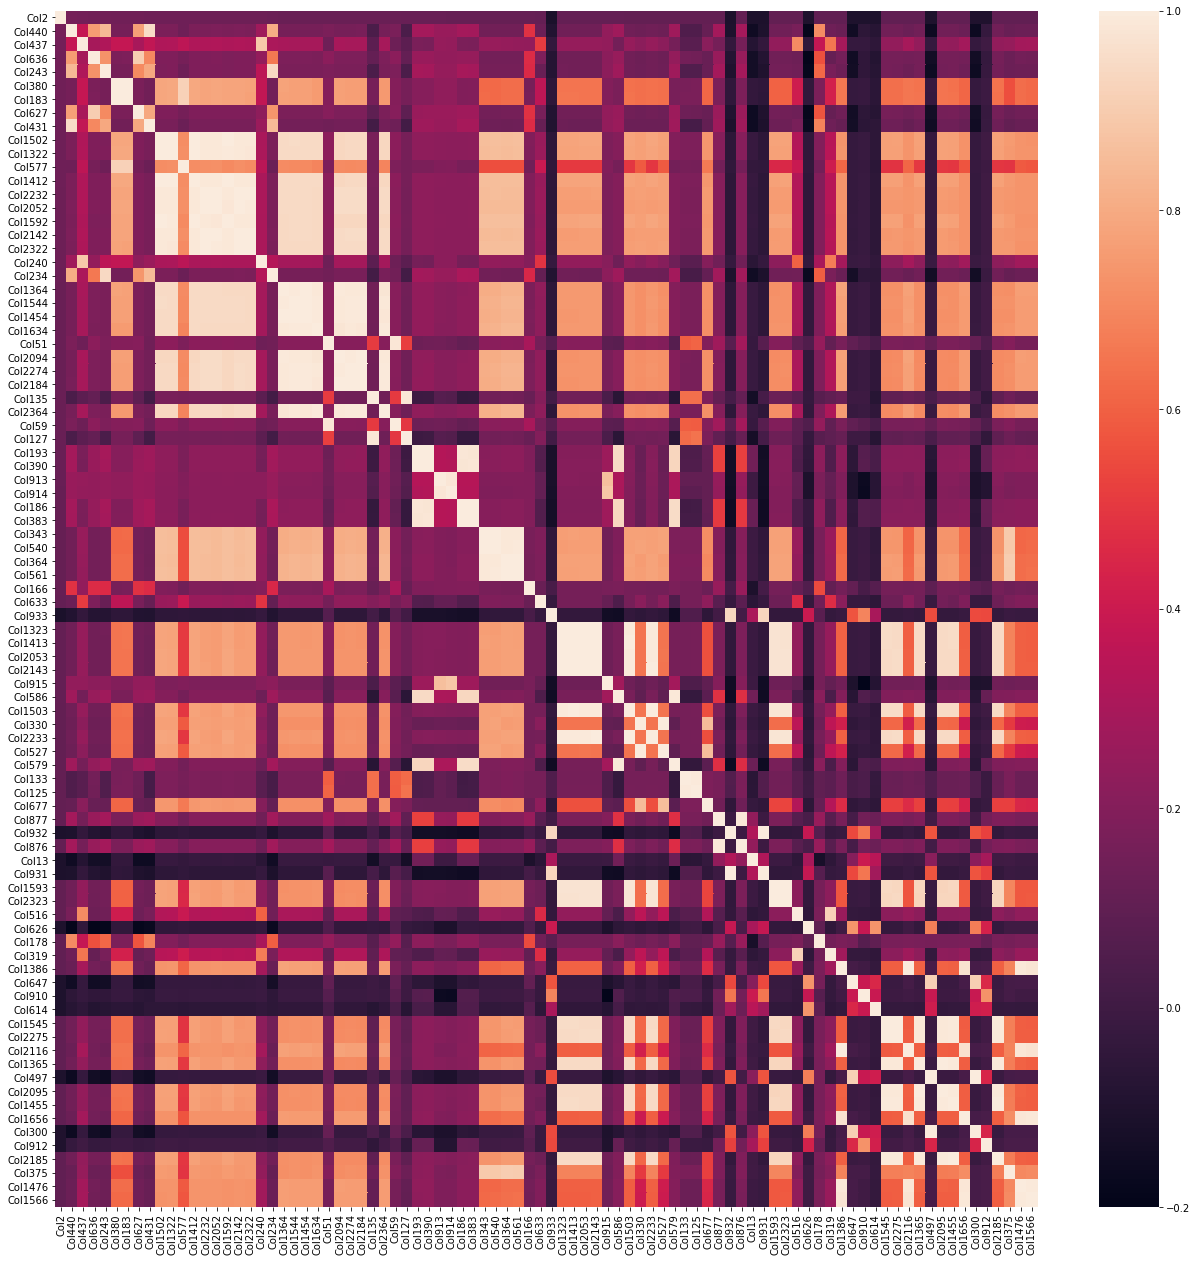

In [61]:
#strong correlation cut-off
a=0.10

#cutoff value for features variance(features with lower variance than this number will be dropped)
b=0.026

strong_corrs=sorted_corrs[sorted_corrs>a]
corrmatrix=numerical_features[strong_corrs.index].corr()
fig,ax=plt.subplots(figsize=(22,22))
sns.heatmap(corrmatrix,ax=ax)

In [62]:
strong_corrs

Col2      1.000000
Col440    0.158115
Col437    0.153429
Col636    0.149626
Col243    0.148745
Col380    0.144346
Col183    0.144158
Col627    0.143149
Col431    0.142403
Col1502   0.138840
Col1322   0.138763
Col577    0.138474
Col1412   0.138181
Col2232   0.137323
Col2052   0.137235
Col1592   0.136746
Col2142   0.136646
Col2322   0.135201
Col240    0.133947
Col234    0.131950
Col1364   0.128270
Col1544   0.127741
Col1454   0.127494
Col1634   0.127063
Col51     0.126177
Col2094   0.126091
Col2274   0.125542
Col2184   0.125298
Col135    0.124898
Col2364   0.124807
            ...   
Col677    0.107786
Col877    0.107400
Col932    0.107055
Col876    0.106874
Col13     0.106508
Col931    0.106451
Col1593   0.105981
Col2323   0.105657
Col516    0.105558
Col626    0.105136
Col178    0.104332
Col319    0.104197
Col1386   0.103573
Col647    0.103064
Col910    0.102591
Col614    0.102127
Col1545   0.101858
Col2275   0.101619
Col2116   0.101606
Col1365   0.101441
Col497    0.101403
Col2095   0.

In [63]:
strong_corrs.index

Index(['Col2', 'Col440', 'Col437', 'Col636', 'Col243', 'Col380', 'Col183',
       'Col627', 'Col431', 'Col1502', 'Col1322', 'Col577', 'Col1412',
       'Col2232', 'Col2052', 'Col1592', 'Col2142', 'Col2322', 'Col240',
       'Col234', 'Col1364', 'Col1544', 'Col1454', 'Col1634', 'Col51',
       'Col2094', 'Col2274', 'Col2184', 'Col135', 'Col2364', 'Col59', 'Col127',
       'Col193', 'Col390', 'Col913', 'Col914', 'Col186', 'Col383', 'Col343',
       'Col540', 'Col364', 'Col561', 'Col166', 'Col633', 'Col933', 'Col1323',
       'Col1413', 'Col2053', 'Col2143', 'Col915', 'Col586', 'Col1503',
       'Col330', 'Col2233', 'Col527', 'Col579', 'Col133', 'Col125', 'Col677',
       'Col877', 'Col932', 'Col876', 'Col13', 'Col931', 'Col1593', 'Col2323',
       'Col516', 'Col626', 'Col178', 'Col319', 'Col1386', 'Col647', 'Col910',
       'Col614', 'Col1545', 'Col2275', 'Col2116', 'Col1365', 'Col497',
       'Col2095', 'Col1455', 'Col1656', 'Col300', 'Col912', 'Col2185',
       'Col375', 'Col1476', 'Co

In [70]:
features = strong_corrs.index
X = train_df[features].copy()
X.head(), X.shape 

(   Col2   Col440   Col437   Col636   Col243  Col380  Col183   Col627   Col431  \
 0     1 0.420924 0.000000 0.460104 1.406820       0       0 0.460104 0.144152   
 1     0 0.000000 0.000123 0.000000 0.000000       0       0 0.000000 0.000000   
 2     0 0.003068 0.000110 0.002855 0.002460       0       0 0.000000 0.000000   
 3     0 0.000000 0.001311 0.000000 0.000000       0       0 0.000000 0.000000   
 4     0      nan      nan      nan      nan      29      29      nan      nan   
 
    Col1502  Col1322  Col577  Col1412  Col2232  Col2052  Col1592  Col2142  \
 0        0        0       0        0        0        0        0        0   
 1        0        0       0        0        0        0        0        0   
 2        0        0       0        0        0        0        0        0   
 3        0        0       0        0        0        0        0        0   
 4        2        2      29        2        2        2        2        2   
 
    Col2322   Col240   Col234  Col1364  Co

In [71]:
print("Minimum Value:\n",X.min(),"\nMaximum value:\n",X.max())

Minimum Value:
 Col2       0.000000
Col440     0.000000
Col437     0.000000
Col636     0.000000
Col243     0.000000
Col380     0.000000
Col183     0.000000
Col627     0.000000
Col431     0.000000
Col1502    0.000000
Col1322    0.000000
Col577     0.000000
Col1412    0.000000
Col2232    0.000000
Col2052    0.000000
Col1592    0.000000
Col2142    0.000000
Col2322    0.000000
Col240     0.000000
Col234     0.000000
Col1364    0.000000
Col1544    0.000000
Col1454    0.000000
Col1634    0.000000
Col51      0.000000
Col2094    0.000000
Col2274    0.000000
Col2184    0.000000
Col135     0.000000
Col2364    0.000000
             ...   
Col677     0.000000
Col877     0.000000
Col932     0.000000
Col876     0.000000
Col13     -1.714798
Col931     0.000000
Col1593    0.000000
Col2323    0.000000
Col516     0.000000
Col626     0.000000
Col178     0.014004
Col319     0.000000
Col1386    0.000000
Col647     0.000000
Col910     0.000000
Col614     0.000000
Col1545    0.000000
Col2275    0.000000
Col2

In [0]:
# Rescale X to bring all features on same level
rescale_train=(X-X.min())/(X.max()-X.min())

In [73]:
# Calculate variance
sorted_vars=rescale_train.var().sort_values()
print(b,"\n",sorted_vars)

0.026 
 Col633    0.000277
Col915    0.000340
Col516    0.000343
Col319    0.000367
Col914    0.000473
Col913    0.000507
Col240    0.000520
Col577    0.000988
Col437    0.001018
Col636    0.001198
Col380    0.001358
Col183    0.001363
Col193    0.001368
Col390    0.001461
Col627    0.001860
Col178    0.002024
Col186    0.002133
Col383    0.002277
Col586    0.002567
Col579    0.003028
Col431    0.003093
Col234    0.003238
Col243    0.003443
Col440    0.003510
Col1545   0.004910
Col1455   0.005066
Col1413   0.005084
Col1323   0.005103
Col1365   0.005173
Col1476   0.006873
            ...   
Col166    0.016878
Col51     0.018471
Col2364   0.019703
Col1634   0.020122
Col561    0.020208
Col2274   0.020281
Col125    0.020393
Col1544   0.020711
Col2322   0.020869
Col2232   0.021196
Col364    0.021494
Col59     0.025349
Col343    0.030595
Col133    0.031159
Col540    0.032338
Col330    0.052017
Col527    0.052431
Col677    0.065321
Col931    0.068847
Col932    0.069118
Col614    0.072608
Col9

In [0]:
# Remove feature with variance less than "b"
new_features = features.drop(sorted_vars[sorted_vars < b].index)

In [0]:
new_train_df = train_df[new_features].copy()

In [79]:
new_train_df.head()

,Col2,Col343,Col540,Col933,Col330,Col527,Col133,Col677,Col932,Col931,Col626,Col647,Col910,Col614,Col497,Col300,Col912,Col375
0,1,nan,nan,0.000000,nan,nan,1,nan,0.000000,0.000000,92.260800,0.000000,nan,98.529400,0.000000,0.000000,nan,nan
1,0,nan,nan,0.326087,0.000000,0.000000,0,nan,0.306122,0.306122,65.504300,27.244800,1.000000,44.736800,26.692900,26.692900,1.000000,nan
2,0,nan,nan,0.794749,0.000000,0.000000,0,0.000000,0.740458,0.740458,46.930500,42.230200,0.990826,80.645200,38.154600,38.154600,1.000000,nan
3,0,nan,nan,0.465228,0.000000,0.000000,0,0.000000,0.502662,0.502662,93.175700,87.168500,0.989474,36.024800,89.187900,89.187900,1.000000,nan
4,0,1.485162,1.485162,0.442589,0.216569,0.216569,0,0.229616,0.532091,0.532091,46.791900,41.425700,1.000000,14.038000,52.016500,52.016500,1.000000,1.034338


In [84]:
train_df.head()

Col1  Col2            Col3            Col4            Col5  \
0    RIGHGSN     1    10867.110000     8648.345000    15766.179090   
1  RIMHI5ZGP     0   258431.243300   217963.272500   186628.682000   
2  RIHOG1SZU     0 14593548.230000 12600603.890000 11003145.240000   
3  RIHOLMQWU     0   672704.313300   818111.575000   679489.260000   
4  RIHO584ET     0 -1218742.457000 -3005360.975000  -166624.058000   

             Col6            Col7            Col8           Col9  \
0    28904.661670     5273.655000    23461.531670   12855.971630   
1   186628.682000   215451.895000   192361.516000  172653.764600   
2 10103145.240000 18798818.460000 15140351.760000 5320778.331000   
3   679489.260000   825725.437500   760580.350000  357713.432600   
4 -2403574.494000  2583182.668000  2086546.134000 5938358.339000   

           Col10          Col11           Col12     Col13     Col14     Col15  \
0   28715.088760    9114.586439    30430.781520  9.293496  8.570479 10.063117   
1  166697.388700  201351.808200   185940.408700 12.462385 12.280493 12.167132   
2 6906324.109000 9368337.948000 11133295.010000 16.496090 16.749305 16.532874   
3  423661.158200  430484.817400   406553.866600 13.419061 13.624018 13.541837   
4 5446532.150000 3473444.143000  3262168.358000       nan 14.764533 14.551021   

      Col16    Col17    Col18  Col19  Col20    Col21    Col22    Col23  \
0 10.271758 0.548538 0.403366    nan    nan 1.486524 1.728324 0.993441   
1 12.136876 1.167898 2.676398    nan    nan 0.792123 0.934556 0.893203   
2 16.128357 1.145182 2.203874    nan    nan 0.422264 0.498347 0.683582   
3 13.429097 1.204010 0.536304    nan    nan 0.437243 0.521341 0.623499   
4       nan      nan      nan    nan    nan      nan 1.344637      nan   

     Col24     Col25    Col26     Col27    Col28  Col29  Col30  Col31  Col32  \
0 1.297050  0.137398 0.115987  0.260428 1.414214      1      1      1      1   
1 0.966620  0.753892 0.808295  1.414214      nan      1      1      3      4   
2 0.735339  0.808115 0.776910  1.414214      nan      3      3      4     12   
3 0.534531 -0.125829 0.388830 -1.414214      nan      2      2      2     24   
4 1.563430 -0.113101 0.617486  1.414214      nan      4      3      4     68   

   Col33  Col34  Col35  Col36  Col37    Col38  Col39  Col40    Col41  \
0      1      1      0      6    nan      nan    nan    nan      nan   
1      4      0      4      5    nan      nan    nan    nan      nan   
2      4      0      2      4    nan 1.000000    nan    nan 2.000000   
3      1      0      1      4    nan      nan    nan    nan 2.000000   
4      8      0      2      4    nan 3.000000    nan    nan 2.000000   

       Col42      Col43  Col44  Col45  Col46  Col47  Col48  Col49  Col50  \
0   6.070000   6.070000      2      3      2      3      2      2      2   
1 116.650000 116.650000      3      0      2      0      2      0      1   
2  33.280000  33.280000      2      1      2      0      1      0      1   
3  -7.750000  -7.750000      2      1      2      1      1      1      1   
4        nan        nan      1      2      1      2      1      2      1   

   Col51  Col52  Col53  Col54  Col55  Col56  Col57  Col58  Col59  Col60  \
0      2      1      3      1      3      1      2      1      2      1   
1      0      3      0      2      0      2      0      1      0      2   
2      0      2      1      2      0      1      0      1      0      1   
3      1      2      1      2      1      1      1      1      1      2   
4      2      1      2      1      2      1      2      1      2      0   

   Col61  Col62  Col63  Col64  Col65  Col66  Col67  Col68  Col69  Col70  \
0      1      1      1      1      1      1      1      3      1      3   
1      0      2      0      2      0      1      0      2      0      2   
2      1      1      0      1      0      1      0      2      1      2   
3      0      2      0      1      0      1      0      2      1      2   
4      2      0      2      0      2      0      

Using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


X = train_df.drop(columns=["Col1","Col2"], axis="columns")  #independent columns
y = train_df["Col2"]    #target column i.e Col2


model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: ignored

In [0]:
# Do train/test split

X = new_train_df.drop("Col2", axis="columns")
y = new_train_df["Col2"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019, test_size=0.25)

In [82]:
# Fit logistic regression model
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model = logistic_model.fit(X_train, y_train)

# Store predictions
y_test_predicted = logistic_model.predict(X_test)
y_test_predicted

#print (metrics.classification_report(y_test, y_test_predicted))
print (metrics.accuracy_score(y_test, y_test_predicted))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: ignored

In [51]:
train_df.std()

Col2            0.300685
Col3       761289.652258
Col4       713690.781322
Col5       601820.695152
Col6       609124.509763
Col7       721199.842534
Col8       748843.286244
Col9       217559.511641
Col10      298150.788834
Col11      261242.667603
Col12      270685.390120
Col13           1.709428
Col14           1.902826
Col15           1.905931
Col16           1.618022
Col17           0.151220
Col18          21.767014
Col19         317.363666
Col20          73.914269
Col21           0.645896
Col22           3.470841
Col23           0.481458
Col24           0.641438
Col25           0.318460
Col26           0.316152
Col27           0.560927
Col28           0.929660
Col29           0.697317
Col30           0.684984
Col31           0.768959
               ...      
Col2368         0.950173
Col2369         0.887700
Col2370         0.992776
Col2371         0.868421
Col2372         0.199218
Col2373         0.219127
Col2374         0.267509
Col2375         0.190296
Col2376         0.952303


In [56]:
 pd.set_option('display.float_format', '{:.6f}'.format)
train_df.var()

Col2                 0.090411
Col3      579561934634.965210
Col4      509354531343.758057
Col5      362188149112.995544
Col6      371032668394.588135
Col7      520129212871.338013
Col8      560766267352.653809
Col9       47332141105.429466
Col10      88893892882.107071
Col11      68247731376.498817
Col12      73270580424.651657
Col13                2.922144
Col14                3.620746
Col15                3.632573
Col16                2.617995
Col17                0.022868
Col18              473.802912
Col19           100719.696477
Col20             5463.319095
Col21                0.417181
Col22               12.046734
Col23                0.231802
Col24                0.411442
Col25                0.101417
Col26                0.099952
Col27                0.314639
Col28                0.864267
Col29                0.486251
Col30                0.469203
Col31                0.591298
                  ...        
Col2368              0.902829
Col2369              0.788012
Col2370   

In [0]:
# Feature Selection using L1-LASSO and Logistic Regression

# 5. Scaling the data, as linear models benefits from feature scaling
# scaler = StandardScaler()
# scaler.fit(X_train.fillna(0))

# 6. Selecting features using Lasso regularisation using SelectFromModel
# Here I will do the model fitting and feature selection, altogether in one line of code. First I specify the Logistic Regression model, and I make sure I select the Lasso (L1) penalty.Then I use the selectFromModel object from sklearn, which will select in theory the features which coefficients are non-zero.
# sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
# sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

# 7. Visualising features that were kept by the lasso regularisation
# sel_.get_support()

# In the above output, the output labels are index wise. So Trueis for the features that lasso thought is important (non-zero features) while False is for the features whose weights were shrinked to zero and are not important according to Lasso.
# 8. Make a list of with the selected features.
# selected_feat = X_train.columns[(sel_.get_support())]
# print('total features: {}'.format((X_train.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
#       np.sum(sel_.estimator_.coef_ == 0)))

# Number of features which coefficient was shrank to zero :
# np.sum(sel_.estimator_.coef_ == 0)

# 9. Identifying the removed features
# removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
# removed_feats

# 10. Removing the features from training an test set
# X_train_selected = sel_.transform(X_train.fillna(0))
# X_test_selected = sel_.transform(X_test.fillna(0))
# X_train_selected.shape, X_test_selected.shape

In [0]:
# Feature Selection using Random Forest
# Feature selection using Random forest comes under the category of Embedded 
# methods. Embedded methods combine the qualities of filter and wrapper methods.
# They are implemented by algorithms that have their own built-in feature 
# selection methods. Some of the benefits of embedded methods are :

# They are highly accurate.
# They generalize better.
# They are interpretable

import pandas as pd
from sklearn.ensemble import RandomForestClassfier
from sklearn.feature_selection import SelectFromModel

X_train,y_train,X_test,y_test = train_test_split(data,test_size=0.3)

#Here I will do the model fitting and feature selection altogether in one line of code.
#Firstly, I specify the random forest instance, indicating the number of trees.
#Then I use selectFromModel object from sklearn to automatically select the features.

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

#SelectFromModel will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.
#4. To see which features are important we can use get_support method on the fitted model.

sel.get_support()

#It will return an array of boolean values. True for the features whose importance is greater than the mean importance and False for the rest.

#5. We can now make a list and count the selected features.

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

#It will return an Integer representing the number of features selected by the random forest.

#6. To get the name of the features selected
print(selected_feat)

#It will return the name of the selected features.
#7. We can also check and plot the distribution of importance.

pd.series(sel.estimator_,feature_importances_,.ravel()).hist()

# It will return a histogram showing the distribution of the features selected using this feature selection technique.

# We can of course tune the parameters of the Decision Tree.Where we put the 
# cut-off to select features is a bit arbitrary. One way is to select the top 
# 10, 20 features. Alternatively, the top 10th percentile. For this, we can use 
# mutual info in combination with SelectKBest or SelectPercentile from sklearn.

# Few of the limitations of Random forest are :

# Correlated features will be given equal or similar importance, but overall 
# reduced importance compared to the same tree built without correlated counterparts.

# Random Forests and decision trees, in general, give preference to features 
# with high cardinality ( Trees are biased to these type of variables ).

# Selecting features by using tree derived feature importance is a very 
# straightforward, fast and generally accurate way of selecting good features 
# for machine learning. In particular, if we are going to build tree methods.

# However, as I said, correlated features will show in a tree similar and 
# lowered importance, compared to what their importance would be if the tree was
# built without correlated counterparts.

# In situations like this, it is better to select features recursively, rather 
# than all together as we have done here.

# RFE with Logistic/Randome Forest

In [0]:
# #no of features
# nof_list=np.arange(1,20)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# score_list =[]
# for n in range(len(nof_list)):
#     X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
#     model = LinearRegression()
#     rfe = RFE(model,nof_list[n])
#     X_train_rfe = rfe.fit_transform(X_train,y_train)
#     X_test_rfe = rfe.transform(X_test)
#     model.fit(X_train_rfe,y_train)
#     score = model.score(X_test_rfe,y_test)
#     score_list.append(score)
#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))
# Optimum number of features: 16
# Score with 16 features: 0.433810

# As seen from above code, the optimum number of features is 16. We now feed 16 
# as number of features to RFE and get the final set of features given by RFE 
# method, as follows:


# cols = list(X.columns)
# model = LinearRegression()
# #Initializing RFE model
# rfe = RFE(model, 16)             
# #Transforming data using RFE
# X_rfe = rfe.fit_transform(X,y)  
# #Fitting the data to model
# model.fit(X_rfe,y)              
# temp = pd.Series(rfe.support_,index = cols)
# selected_features_rfe = temp[temp==True].index
# print(selected_features_rfe)
# Index(['SibSp', 'Parch', 'FamilySize', 'Single', 'SmallF', 'MedF', 'LargeF',
#        'IsAlone', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Em_S', 'Pc_1',
#        'Pc_2', 'Pc_3'],
#       dtype='object')

# Feature Importance with datasets.load_iris() # fit an ExtraPython
# # Feature Importance
# from sklearn import datasets
# from sklearn import metrics
# from sklearn.ensemble import ExtraTreesClassifier
# # load the iris datasets
# dataset = datasets.load_iris()
# # fit an Extra Trees model to the data
# model = ExtraTreesClassifier()
# model.fit(dataset.data, dataset.target)
# # display the relative importance of each attribute
# print(model.feature_importances_)

# # Feature Importance
# from sklearn import datasets
# from sklearn import metrics
# from sklearn.ensemble import ExtraTreesClassifier
# # load the iris datasets
# dataset = datasets.load_iris()
# # fit an Extra Trees model to the data
# model = ExtraTreesClassifier()
# model.fit(dataset.data, dataset.target)
# # display the relative importance of each attribute
# print(model.feature_importances_)


# # Recursive Feature Elimination
# from sklearn import datasets
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# # load the iris datasets
# dataset = datasets.load_iris()
# # create a base classifier used to evaluate a subset of attributes
# model = LogisticRegression()
# # create the RFE model and select 3 attributes
# rfe = RFE(model, 3)
# rfe = rfe.fit(dataset.data, dataset.target)
# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

# # Recursive Feature Elimination
# from sklearn import datasets
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# # load the iris datasets
# dataset = datasets.load_iris()
# # create a base classifier used to evaluate a subset of attributes
# model = LogisticRegression()
# # create the RFE model and select 3 attributes
# rfe = RFE(model, 3)
# rfe = rfe.fit(dataset.data, dataset.target)
# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

In [0]:
# skewness & kurtosis
# pd.DataFrame({"Skewness": train_df.skew(), "Kurtosis": train_df.kurt()})

In [0]:
# numerical_features = train_df.select_dtypes(exclude="object").copy()
## numerical_features.fillna(value=0, inplace=True)

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
# vif["features"] = numerical_features.columns
# vif

In [0]:
Check if variance is constant